In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import cv2
import os 
import random
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
DIRECTORY = r'/content/drive/MyDrive/Person_Classification/Images/'
CATEGORIES = ['Female', 'Male']
IMG_SIZE = 224

In [4]:
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)  #Converts to img array
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])
        # print(img_arr.shape)
        # plt.imshow(img_arr)
        # break


In [5]:
print(len(data))
random.shuffle(data)

800


In [6]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X = X/255  #Feature Scaling

In [9]:
print(X.shape)
print(y.shape)
print(X.shape[1:])

(800, 224, 224, 3)
(800,)
(224, 224, 3)


In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(640, 224, 224, 3)
(160, 224, 224, 3)
(640,)
(160,)


In [12]:
model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu' ))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# input_shape=X.shape
# model.build(input_shape)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [18]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [19]:
from keras import callbacks
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Person_Classification/Images',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Person_Classification/Images',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'binary')

model_history = model.fit(train_set,
                         epochs = 100,
                         validation_data = test_set,    
                         validation_steps = 5, 
                         callbacks=early_stopping)


Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 35s 693ms/step - loss: 0.5814 - accuracy: 0.6837 - val_loss: 0.5580 - val_accuracy: 0.6750
Epoch 2/100
50/50 [==============================] - 33s 663ms/step - loss: 0.5733 - accuracy: 0.6750 - val_loss: 0.5440 - val_accuracy: 0.7125
Epoch 3/100
50/50 [==============================] - 30s 609ms/step - loss: 0.5376 - accuracy: 0.7212 - val_loss: 0.4771 - val_accuracy: 0.7250
Epoch 4/100
50/50 [==============================] - 31s 618ms/step - loss: 0.5397 - accuracy: 0.7138 - val_loss: 0.5392 - val_accuracy: 0.7125
Epoch 5/100
50/50 [==============================] - 30s 601ms/step - loss: 0.5316 - accuracy: 0.7225 - val_loss: 0.5516 - val_accuracy: 0.7125
Epoch 6/100
50/50 [==============================] - 31s 620ms/step - loss: 0.5278 - accuracy: 0.7250 - val_loss: 0.4355 - val_accuracy: 0.7375
Epoch 7/100
50/50 [==============================] - 3

In [20]:
# model_history = model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_data=(test_images, test_labels))

In [21]:
model.save('/content/drive/MyDrive/Person_Classification/model.h5')

In [22]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

5/5 - 1s - loss: 0.2193 - accuracy: 0.9625 - 1s/epoch - 264ms/step


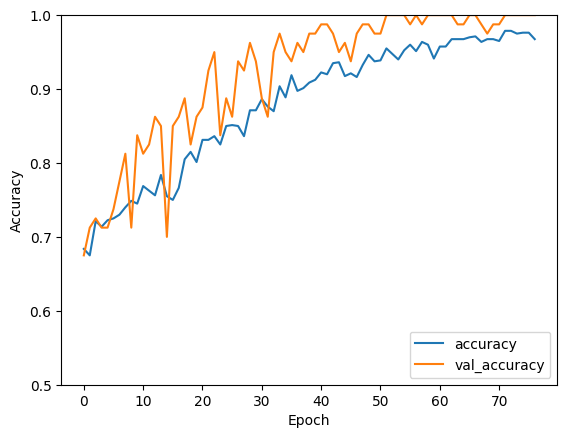

In [23]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# *Prediction:*


In [39]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Person_Classification/Images/Female/female_399.jpg')
img = img.resize((224,224))

In [40]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [41]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 224, 224, 3)

In [42]:
result = model.predict(img_array)
result

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)

In [43]:
# argmax_index = np.argmax(result, axis=1)
if result[0] == 0:
    print("Predicted: Female")
else:
    print("Predicted: Male")

Predicted: Female
